In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import MinMaxScaler
init_notebook_mode(connected=True)

## Cluster Profile

In [ ]:
df_customer = pd.read_csv('customers_clusters.csv')
df_customer.head()

,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std,cluster
0,10,1391,3237.54,18.822907,31,106,2.000000,2,13,8,1.142857,404.692500,174.402907,5
1,15,5060,7281.38,29.479271,2,115,1.508130,4,12,3,0.750000,606.781667,285.194031,1
2,5,439,948.25,33.866071,95,24,10.296296,0,9,0,0.000000,316.083333,97.181947,7
3,15,2103,4668.30,45.323301,25,62,3.411765,2,16,5,0.454545,666.900000,179.245487,1
4,12,2057,5411.91,88.719836,15,46,5.950000,4,15,3,3.000000,676.488750,688.795821,1


Nesta seção, analisarei as características de cada cluster para compreender os comportamentos e preferências distintos de diferentes segmentos de clientes e também traçarei o perfil de cada cluster para identificar as principais características que definem os clientes em cada cluster.

In [ ]:
scaler = MinMaxScaler()
df_customer_minmax = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))
df_customer_minmax = pd.DataFrame(df_customer_minmax, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_minmax['cluster'] = df_customer['cluster']
df_customer_minmax.head()

,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std,cluster
0,0.236842,0.110854,0.305091,0.020207,0.083110,0.194805,0.015686,0.333333,0.461538,0.8,0.126984,0.083034,0.113271,5
1,0.368421,0.403461,0.686164,0.031647,0.005362,0.211503,0.011828,0.666667,0.384615,0.3,0.083333,0.124498,0.185227,1
2,0.105263,0.034931,0.089359,0.036356,0.254692,0.042672,0.080755,0.000000,0.153846,0.0,0.000000,0.064853,0.063118,7
3,0.368421,0.167637,0.439919,0.048656,0.067024,0.113173,0.026759,0.333333,0.692308,0.5,0.050505,0.136833,0.116416,1
4,0.289474,0.163968,0.509994,0.095244,0.040214,0.083488,0.046667,0.666667,0.615385,0.3,0.333333,0.138801,0.447358,1


Agora precisamos achars os centróides ou as médias de cada variável nos clusters, pois são as médias que preencherão e definirão o perfil do cluster em nosso gráfico.

In [ ]:
cluster_centroids = df_customer_minmax.groupby('cluster').mean()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

def customer_profile_data(num_clusters=[0,1],result_name=''):
  features = cluster_centroids.columns.tolist()
  #c_1 = [22, 98, 8, 109, 111, 29]
  c_1 = cluster_centroids[cluster_centroids.index==num_clusters[0]].values[0]
  #c_2 = [49, 67, 140, 13, 24]
  c_2 = cluster_centroids[cluster_centroids.index==num_clusters[1]].values[0]

  fig = make_subplots(
  rows = 1, cols = 2,
  specs = [[{"type": "scatterpolar"}, {"type": "scatterpolar"}]],
  subplot_titles = (f"Cluster {num_clusters[0]}", f"Cluster {num_clusters[1]}"))

  fig.add_trace(go.Scatterpolar(
  r = c_1,
  theta = features,
  fill = 'toself',
  name = f"Cluster {num_clusters[0]}"), row = 1, col = 1)

  fig.add_trace(go.Scatterpolar(
  r = c_2,
  theta = features,
  fill = 'toself',
  name = f"Cluster {num_clusters[1]}"), row = 1, col = 2)

  fig.update_layout(showlegend = False, title_text = "Customer Profile")
  for annotation in fig['layout']['annotations']:
      annotation['yanchor'] = 'bottom'
      annotation['y'] = 1.1
      annotation['yref'] = 'paper'

  fig.show(renderer="svg",width=1200)
 # pio.plot(fig, show_link = True, filename = 'customer_profile_'+ result_name+'.html')

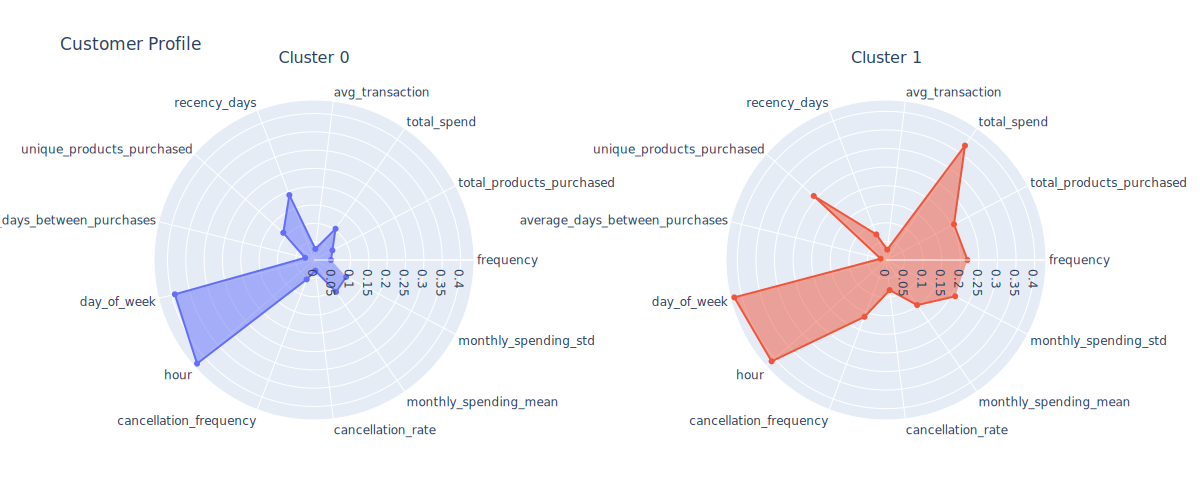

In [ ]:
customer_profile_data(num_clusters=[0,1])

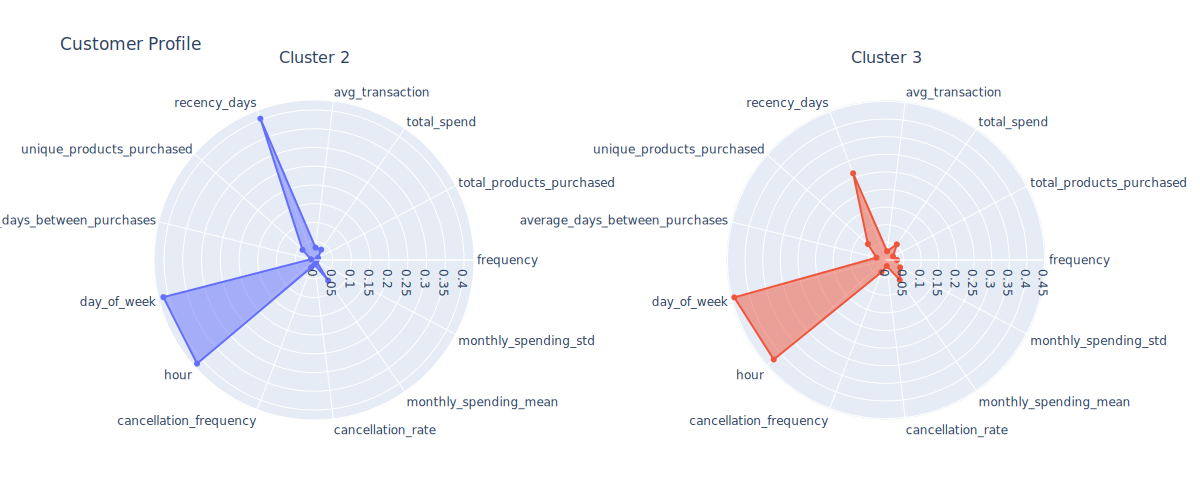

In [ ]:
customer_profile_data(num_clusters=[2,3])

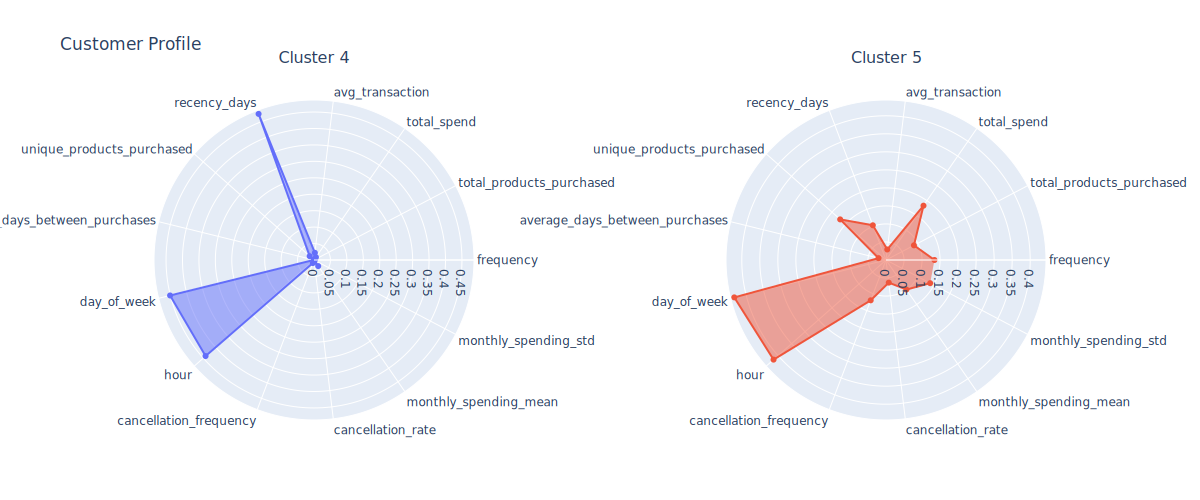

In [ ]:
customer_profile_data(num_clusters=[4,5])

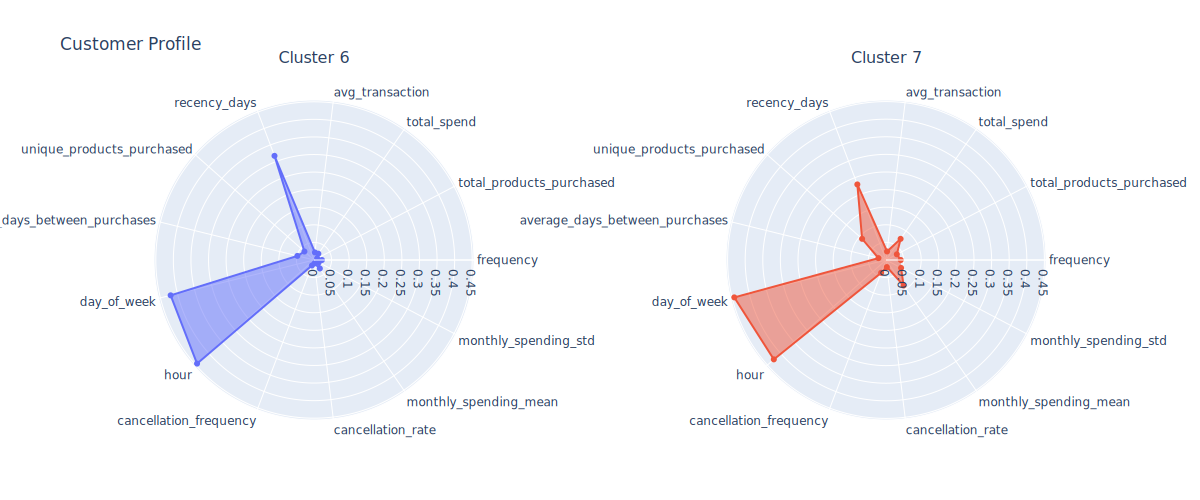

In [ ]:
customer_profile_data(num_clusters=[6,7])

In [ ]:
sns.set_style('darkgrid')

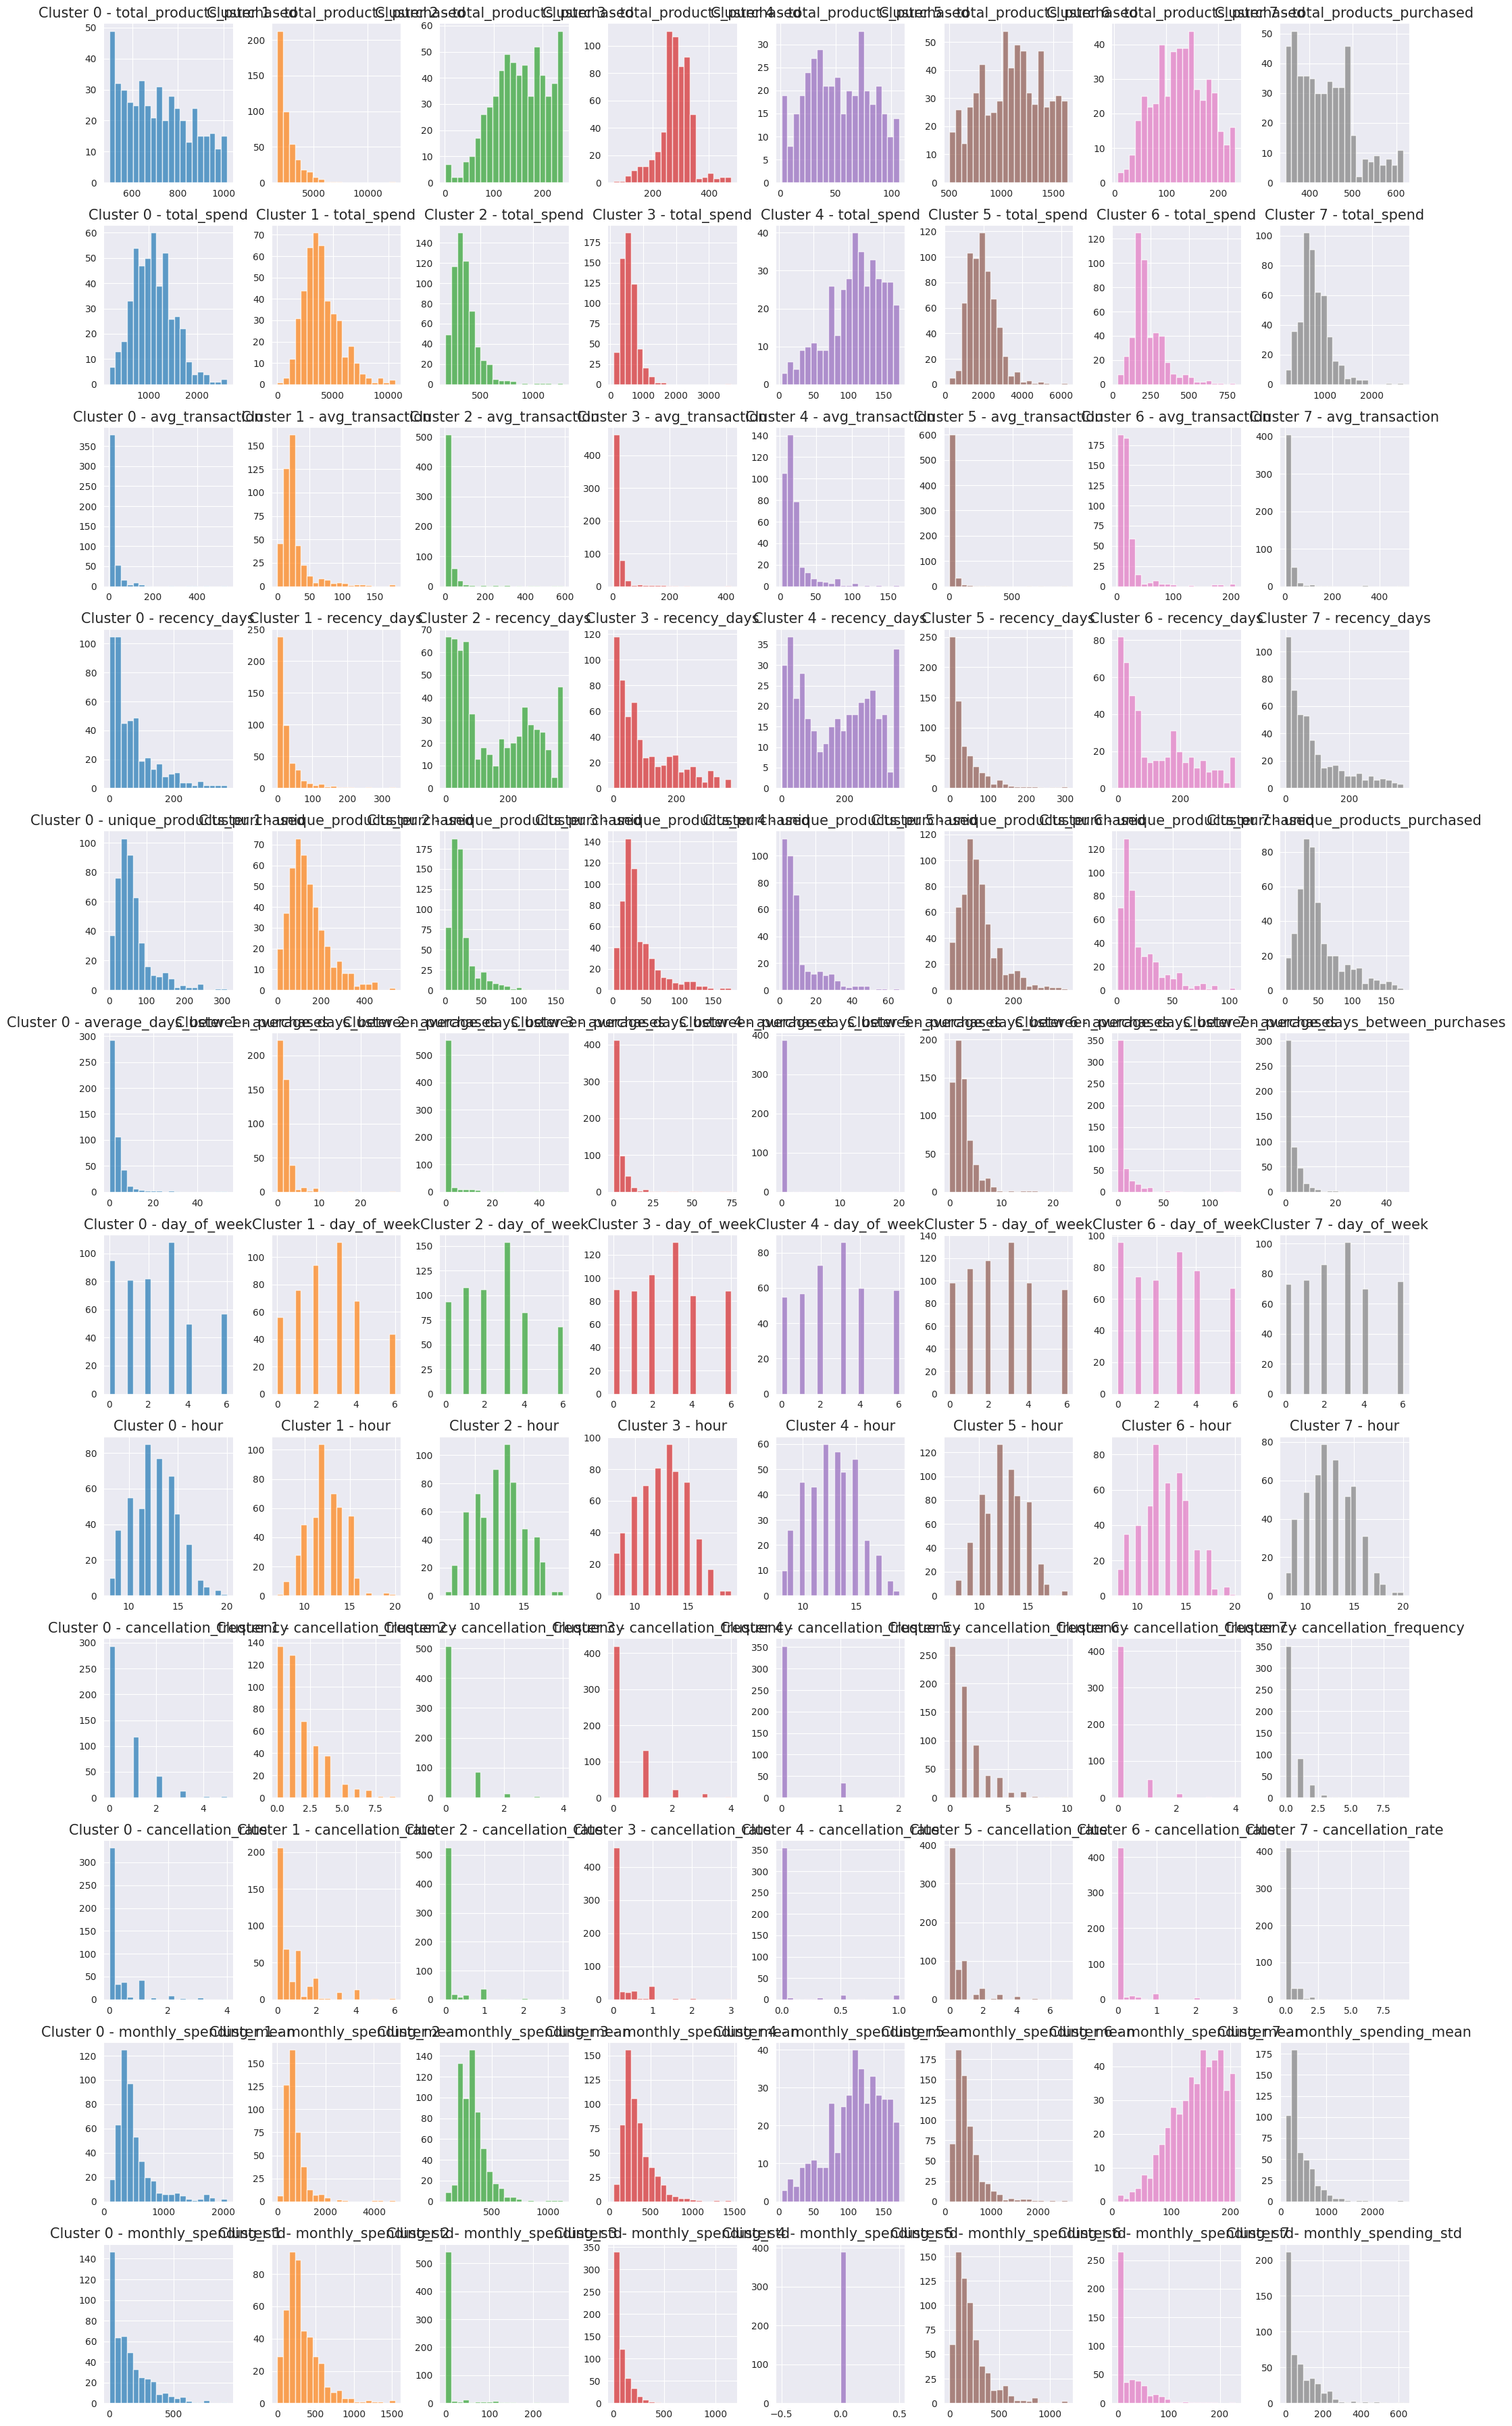

In [ ]:
# Plot histograms for each feature segmented by the clusters
features = df_customer.columns[1:-1]
clusters = df_customer['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))
colors = sns.color_palette('tab10', n_colors=len(clusters))
# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df_customer[df_customer['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

plt.tight_layout()
plt.show()

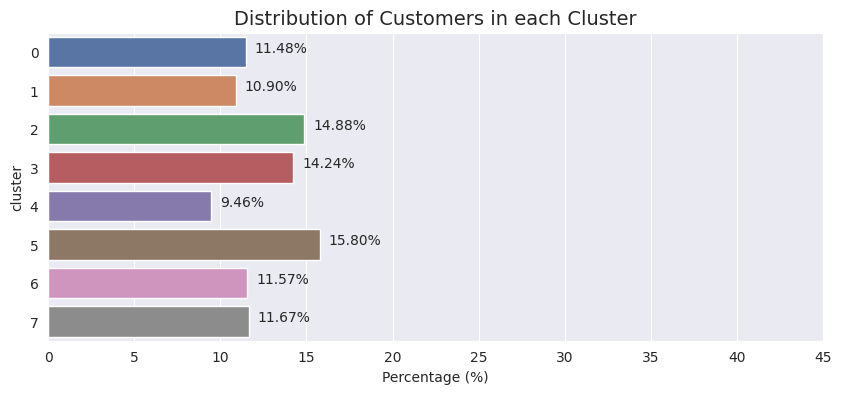

In [ ]:
cluster_percentage = (df_customer['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['cluster', 'percentage']
cluster_percentage.sort_values(by='cluster', inplace=True)
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='percentage', y='cluster', data=cluster_percentage, orient='h', palette='deep')
for index, value in enumerate(cluster_percentage['percentage']):
    ax.text(value+0.5, index, f'{value:.2f}%')
plt.title('Distribution of Customers in each Cluster', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')
plt.show()

In [ ]:
df_customer.groupby('cluster').mean().style.background_gradient(cmap='coolwarm')

,frequency,total_products_purchased,total_spend,avg_transaction,recency_days,unique_products_purchased,average_days_between_purchases,day_of_week,hour,cancellation_frequency,cancellation_rate,monthly_spending_mean,monthly_spending_std
cluster,,,,,,,,,,,,,
0,2.763214,711.909091,1099.828753,28.195927,70.775899,61.380550,3.193537,2.348837,12.547569,0.566596,0.265073,515.906836,152.650153
1,9.334076,2592.810690,3971.560356,26.274643,27.452116,141.140312,1.900771,2.523385,12.347439,1.634744,0.734768,718.321510,323.732881
2,1.264274,153.877651,357.556757,31.086478,150.401305,23.045677,1.056142,2.482871,12.417618,0.213703,0.112114,324.999959,10.480680
3,2.194208,280.609881,572.597598,23.361089,98.170358,37.972743,3.571139,2.660988,12.534923,0.371380,0.156339,333.997670,69.612903
4,1.048718,52.702564,109.940769,20.484085,177.279487,10.453846,0.069231,2.705128,12.728205,0.100000,0.047673,109.940769,0.000000
5,6.110599,1098.360983,1943.364164,27.395442,38.416283,92.520737,2.726178,2.600614,12.417819,1.196621,0.569247,485.459736,213.031688
6,1.859539,128.327044,231.685765,20.171396,118.197065,20.612159,6.203293,2.519916,12.777778,0.167715,0.088868,143.037001,23.350026
7,2.596674,436.927235,774.570252,22.775474,85.644491,49.879418,2.815668,2.663202,12.534304,0.388773,0.182020,428.390099,74.508734


Perfis de clientes derivados da análise dos gráficos e médias
📝
### Cluster 0 (11.48% da base) - More frequency:
📝 Perfil: Clientes que gastam de maneira moderada com uma média de 1099 de gasto total. A recência é alta (média de 70 dias desde a última compra). Eles compram com pouca frequência e não compram tantos produtos. São clientes que cancelam pouco e possuem uma baixa variação mensal de gastos.
- **Este cluster contém clientes que precisam aumentar a frequência de compras.**

### Cluster 1 (10.90% da base) - GUILD:
📝 Perfil: São os clientes que mais gastam com uma média de 3971 de total gasto. A recência é baixa (média de 27 dias). Compram uma diversidade grande de produtos e têm alta frequência de compra. Possuem uma elevada variação de gastos mensais, indicando que seus padrões de gastos são mais instáveis.Apesar de gastarem muito, este grupo também é o que mais cancela, indicando possíveis compras impulsivas. Estes clientes compram mais no meio da semana e durante a tarde.

### Cluster 2 (14.88% da base)- Clientes em churn - More products:
📝 Perfil: Compram muito pouco, a média de gasto total é baixa. A recência é muito alta (média de 150 dias) o que indica que são clientes em churn. Compram poucos produtos, têm baixa frequência de compra e cancelam pouco. Apesar da baixa frequência nas compras, a média de transação é mais elevada, indicando que quando estes clientes vão às compras têm uma tendência a gastar mais.
- **Este cluster contém clientes em churn e que precisam comprar um número maior de produtos.**

### Cluster 3 (14.24% da base)- More spend and recent purchases:
📝 Perfil: Clientes que compram muito pouco, a média de gasto total é baixa (572). A recência é alta (média de 98 dias). Compram poucos produtos, têm baixa frequência de compra e cancelam pouco.
- **Este cluster contém clientes que precisam gastar mais e fazer compras mais recentes.**

### Cluster 4 (9.46% da base) - Clientes em churn - Even more products:
📝 Perfil: Compram poquíssimo, a média de gasto total é a mais baixa (109). A recência é mais alta (média de 177 dias), que indica que também é um grupo de clientes em churn. Compram poucos produtos, têm baixa frequência de compra e cancelam pouco.
- **Este cluster contém clientes que precisam urgentemente serem reativados, além de que precisam aumentar o número de produtos comprados.**

### Cluster 5 (15.80% da base) - Even more spend:
📝 Perfil: Bons compradores, a média de gasto total é a segunda maior(1943). A recência é relativamente baixa (média de 38 dias). Compram diversos produtos, têm uma alta frequência de compra, porém possuem uma taxa de cancelamento mais elevada. Gastam bem mensalmente com alta variação nos gastos mensais.
- **Este cluster é o que mais se aproxima do GUILD, contém clientes que precisam gastar mais.**

### Cluster 6 (11.57% da base) - Clientes em churn - More frequency and products:
📝 Perfil: Gastam pouco, a média de gasto total é baixa (231). A recência é alta (média de 118 dias), então também são clientes em churn. São os clientes que mais demoram entre uma compra e outra. Compram poucos produtos, têm uma baixa frequência de compra e cancelamento.
- **Este cluster contém clientes em churn que precisam ser recuperados, além disso, são clientes que precisam comprar uma maior variedade de produtos.**

### Cluster 7 (11.67% da base) - Even more frequency and recency:
📝 Perfil: Compram  razoalvemente bem comparado aos outros clusters, a média de gasto total é moderada (774). A recência é alta (média de 85 dias). Compram poucos produtos, têm uma baixa frequência de compra e cancelamento.
-**Este cluster contém clientes que precisam comprar com mais frequência e realizar compras mais recentes**

## Insights gerais

### Top products per cluster

Iremos ver quais são os produtos mais vendidos (best sellers) de acordo com cada cluster.

In [ ]:
data = pd.read_csv('customers_clustered.csv')
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,transaction_status,cluster
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,Completed,5
1,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,Completed,5
2,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,Completed,5
3,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,Completed,5
4,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom,Completed,5


In [ ]:
aux = data[data['transaction_status']=='Completed'].groupby(['cluster','stock_code','description'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
aux.head()

,cluster,stock_code,description,quantity
5960,1,84826,ASSTD DESIGN 3D PAPER STICKERS,13066
5788,1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,11728
6131,1,85099B,JUMBO BAG RED RETROSPOT,8618
5867,1,84568,GIRLS ALPHABET IRON ON PATCHES,7296
5988,1,84879,ASSORTED COLOUR BIRD ORNAMENT,7204


In [ ]:
# produtos mais vendidos para o cluster 0
aux[aux['cluster']==0].head(5)

,cluster,stock_code,description,quantity
2552,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2976
2709,0,84879,ASSORTED COLOUR BIRD ORNAMENT,2567
846,0,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1889
2834,0,85099B,JUMBO BAG RED RETROSPOT,1862
501,0,21498,RED RETROSPOT WRAP,1725


In [ ]:
# produtos mais vendidos para o cluster 1
aux[aux['cluster']==1].head(5)

,cluster,stock_code,description,quantity
5960,1,84826,ASSTD DESIGN 3D PAPER STICKERS,13066
5788,1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,11728
6131,1,85099B,JUMBO BAG RED RETROSPOT,8618
5867,1,84568,GIRLS ALPHABET IRON ON PATCHES,7296
5988,1,84879,ASSORTED COLOUR BIRD ORNAMENT,7204


In [ ]:
# produtos mais vendidos para o cluster 2
aux[aux['cluster']==2].head(5)

,cluster,stock_code,description,quantity
8863,2,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1044
8742,2,84879,ASSORTED COLOUR BIRD ORNAMENT,731
7409,2,22469,HEART OF WICKER SMALL,668
7177,2,22178,VICTORIAN GLASS HANGING T-LIGHT,559
8854,2,85099B,JUMBO BAG RED RETROSPOT,529


In [ ]:
# produtos mais vendidos para o cluster 3
aux[aux['cluster']==3].head(5)

,cluster,stock_code,description,quantity
11772,3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1208
11633,3,84879,ASSORTED COLOUR BIRD ORNAMENT,1179
11478,3,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,927
9928,3,22178,VICTORIAN GLASS HANGING T-LIGHT,875
11315,3,47566,PARTY BUNTING,845


In [ ]:
# produtos mais vendidos para o cluster 4
aux[aux['cluster']==4].head(5)

,cluster,stock_code,description,quantity
13571,4,84946,ANTIQUE SILVER T-LIGHT GLASS,456
13572,4,84946,ANTIQUE SILVER TEA GLASS ETCHED,240
13639,4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,229
13560,4,84879,ASSORTED COLOUR BIRD ORNAMENT,176
12501,4,22178,VICTORIAN GLASS HANGING T-LIGHT,158


In [ ]:
# produtos mais vendidos para o cluster 5
aux[aux['cluster']==5].head(5)

,cluster,stock_code,description,quantity
16450,5,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,6240
16656,5,84879,ASSORTED COLOUR BIRD ORNAMENT,5813
16821,5,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4735
16808,5,85099B,JUMBO BAG RED RETROSPOT,4708
14081,5,21212,PACK OF 72 RETROSPOT CAKE CASES,3861


In [ ]:
# produtos mais vendidos para o cluster 6
aux[aux['cluster']==6].head(5)

,cluster,stock_code,description,quantity
18195,6,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,526
18196,6,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,431
19461,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,420
19452,6,85099B,JUMBO BAG RED RETROSPOT,400
17073,6,15036,ASSORTED COLOURS SILK FAN,384


In [ ]:
# produtos mais vendidos para o cluster 7
aux[aux['cluster']==7].head(5)

,cluster,stock_code,description,quantity
22236,7,84879,ASSORTED COLOUR BIRD ORNAMENT,2251
22080,7,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1912
22367,7,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1205
20513,7,22178,VICTORIAN GLASS HANGING T-LIGHT,1167
19924,7,21212,PACK OF 72 RETROSPOT CAKE CASES,935


## Hipóteses de negócio

### Hipóteses Compra

1. Os clientes do cluster Guild possuem um volume (produtos) de compras acima de 10% do total de compras
2. Os clientes do cluster Guild têm uma taxa de cancelamento abaixo da média da base total de clientes
3. A mediana do faturamento do cluster Guild é 10% maior que a mediana do faturamento geral


#### H1. Os clientes do cluster Guild possuem um volume (produtos) de compras acima de 10% do total de compras

- Verdadeiro: O cluster Guild representa um volume de compra de produtos de 42%.

In [ ]:
total_products_guild = df_customer[df_customer['cluster']==1]['total_products_purchased'].sum()
total_products = df_customer['total_products_purchased'].sum()
print(f'Porcentagem de produtos comprados pelo cluster Guild: {total_products_guild/total_products*100:.2f}%')

Porcentagem de produtos comprados pelo cluster Guild: 42.07%


#### H2. Os clientes do cluster Guild possuem um volume (faturamento) de compras acima de 10% do total de compras

- Verdadeiro: O cluster Guild possui um volume de GMV de 38%

In [ ]:
# gmv = gross margin value (o quanto de dinheiro entra na empresa, sem descontar os impostos)
df_sales_guild = df_customer[df_customer['cluster']==1]['total_spend'].sum()
df_sales = df_customer['total_spend'].sum()
print(f'Porcentagem de faturamento do cluster Guild: {df_sales_guild/df_sales*100:.2f}%')

Porcentagem de faturamento do cluster Guild: 38.35%


#### H3. Os clientes do cluster Guild têm uma taxa de cancelamento abaixo da média da base total de clientes.

- Falso: O cluster Guild possui média de devolução acima da média geral

In [ ]:
avg_cancellation_guild = df_customer[df_customer['cluster']==1]['cancellation_frequency'].mean()
avg_cancellation = df_customer['cancellation_frequency'].mean()
print(f'Média de cancelamento do cluster Guild: {avg_cancellation_guild:.2f}')
print(f'Média de cancelamento geral: {avg_cancellation:.2f}')

Média de cancelamento do cluster Guild: 1.63
Média de cancelamento geral: 0.59


#### H4. A mediana do faturamento do cluster Guild é 10% maior que a mediana do faturamento geral

- Verdadeiro: A mediana do cluster Guild é 491.85% maior que a mediana de faturamento geral

In [ ]:
median_gmv_guild = df_customer[df_customer['cluster']==1]['total_spend'].median()
median_gmv = df_customer['total_spend'].median()
print(f'Mediana do faturamento do cluster Guild: {median_gmv_guild:.2f}')
print(f'Mediana do faturamento geral: {median_gmv:.2f}')
print(f'A mediana do cluster Guild é {(median_gmv_guild - median_gmv)/median_gmv*100:.2f}% maior que a mediana de faturamento geral')

Mediana do faturamento do cluster Guild: 3709.56
Mediana do faturamento geral: 626.77
A mediana do cluster Guild é 491.85% maior que a mediana de faturamento geral


#### H5. O faturamento dos clientes Guild está concentrado no terceiro quartil

- Falso: A maior parte do faturamento dos clientes Guild está distribuida no segundo quartil

In [ ]:
df_customer[df_customer['cluster']==1]['total_spend'].quantile(0.1)

2099.288

In [ ]:
df_customer[df_customer['cluster']==1]['total_spend'].quantile(0.9)

6226.881999999999

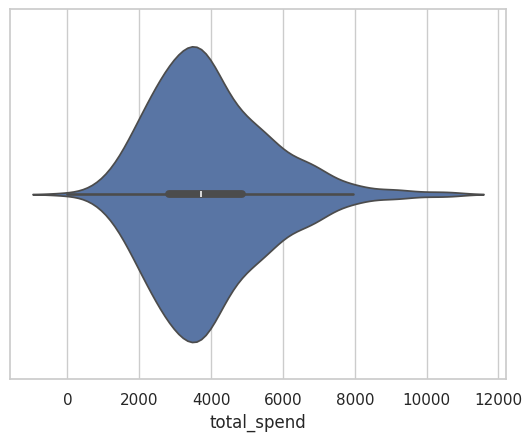

In [ ]:
sns.violinplot(x='total_spend', data=df_customer[df_customer['cluster']==1])
plt.show()

### Hipóteses Cliente

1. 10% dos clientes do cluster Guild estão dentro do Reino Unido.

#### H6. 10% dos clientes do cluster Guild estão dentro do Reino Unido.

- Verdadeiro: 89% dos clientes do cluster Guild estão dentro do Reino Unido.

In [ ]:
aux2 = data[['customer_id','cluster','country']].groupby(['cluster','country']).count().reset_index().sort_values(by='customer_id', ascending=False)
guild_sales_uk = aux2[(aux2['cluster']==1) & (aux2['country']=='United Kingdom')]['customer_id'].sum()
guild_sales = aux2[aux2['cluster']==1]['customer_id'].sum()
print(f'Porcentagem de clientes do cluster Guild em UK: {guild_sales_uk/guild_sales*100:.2f}%')

Porcentagem de clientes do cluster Guild em UK: 89.65%


### Hipóteses Produto

1. A mediana dos preços dos produtos comprados pelos clientes do cluster Guild é 10% maior do que a mediana de todos os preços dos produtos

#### H7. A mediana dos preços dos produtos comprados pelos clientes do cluster Guild é 10% maior do que a mediana de todos os preços dos produtos

- Falso: A mediana dos preços dos produtos comprados pelos clientes do cluster Guild é 15% menor que a mediana de todos os preços dos produtos totais

In [ ]:
guild_products_median = data[data['cluster']==1].drop_duplicates(subset='stock_code')['unit_price'].median()
products_median = data.drop_duplicates(subset='stock_code')['unit_price'].median()
print(f'Mediana dos preços dos produtos comprados pelos clientes do cluster Guild: {guild_products_median:.2f}')
print(f'Mediana de todos os preços dos produtos: {products_median:.2f}')
print(f'A mediana de preço dos produtos cluster Guild é {(guild_products_median - products_median)/products_median*100:.2f}% menor que a mediana dos preços dos produtos geral')

Mediana dos preços dos produtos comprados pelos clientes do cluster Guild: 1.65
Mediana de todos os preços dos produtos: 1.95
A mediana de preço dos produtos cluster Guild é -15.38% menor que a mediana dos preços dos produtos geral


### Perguntas de Negócio

- Quem são as pessoas elegíveis para participar do programa de Guild ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Guild ?
- Quais as condições para uma pessoa ser elegível ao Guild ?
- Qual a garantia que o programa Guild é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?


### Quem são as pessoas elegíveis para participar do programa de Guild ?

In [ ]:
data[data['cluster']==1].drop_duplicates(subset='customer_id').head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,transaction_status,cluster
194,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,Completed,1
457,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,2010-12-01 09:32:00,3.45,15291.0,United Kingdom,Completed,1
565,536380,22961,JAM MAKING SET PRINTED,24,2010-12-01 09:41:00,1.45,17809.0,United Kingdom,Completed,1
762,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431.0,Australia,Completed,1
1045,536398,21980,PACK OF 12 RED RETROSPOT TISSUES,24,2010-12-01 10:52:00,0.29,13448.0,United Kingdom,Completed,1


### Quantos clientes farão parte do grupo?

In [ ]:
df_customer[df_customer['cluster']==1].shape[0]

449

### Quais as principais características desses clientes ?

📝 Perfil: São os clientes que mais gastam com uma média de 3971 de total gasto. A recência é baixa (média de 27 dias). Compram uma diversidade grande de produtos e têm alta frequência de compra. Possuem uma elevada variação de gastos mensais, indicando que seus padrões de gastos são mais instáveis.Apesar de gastarem muito, este grupo também é o que mais cancela, indicando possíveis compras impulsivas. Estes clientes compram mais no meio da semana e durante a tarde.

In [ ]:
import scipy.stats as st

In [ ]:
df_guild = df_customer[df_customer['cluster']==1]['total_spend']
st.t.interval(confidence=0.95,
              df=len(df_guild)-1,
              loc=np.mean(df_guild),
              scale=st.sem(df_guild))

(3818.810175190683, 4124.310537504194)

In [ ]:
df_customer[df_customer['cluster']==1]['total_spend'].mean()

3971.5603563474388

### Qual a porcentagem de contribuição do faturamento, vinda do Guild ?

Porcentagem de faturamento do cluster Guild é de 38.35%

### Quais as condições para uma pessoa ser elegível ao Guild ?

De maneira geral, não podemos dizer tais condições, apenas o modelo de clusterização pode fazer isso. Mas se quisermos nos basear nas características do cluster Guild, podemos citar:

- Total gasto dentro de determinado valor (R$ 3818 - R$ 4124).
- Recência baixa (ex.: compra recente dentro dos últimos 27 dias).
- Alta frequência de compra e diversidade de produtos adquiridos.
- Elevada variação de gastos mensais.




### Qual a garantia que o programa Guild é melhor que o restante da base ?

Encontramos um cluster com gastos e frequência de compra elevados e uma baixa recência, mas uma garantia de sua eficácia só será possível ao observar a curva de contribuição deste cluster no tempo, quando comparado aos outros.

### Quais ações o time de marketing pode realizar para aumentar o faturamento ?

Exemplos de ações que o time de marketing poderá realizar:

- Campanhas personalizadas: Enviar ofertas e promoções exclusivas para membros do Guild com base em seus produtos preferidos

- Engajamento e retenção: Melhorar a experiência de compra online e o suporte ao cliente para reduzir cancelamentos e devoluções

- Comunicação e feedback: Coletar feedback constante dos membros do Guild para aprimorar o programa e identificar áreas de melhoria

